---
## 3- From Self-Attention to Transformers: Architecture & Intuition


Now that we understand **Self-Attention**, we're ready to see how it's used to build one of the most powerful architectures in deep learning:

# ⚙️ Transformers

---

## 🧩 What Is a Transformer?

A **Transformer** is a neural network architecture built entirely using **self-attention layers**, without recurrence or convolution.

> Introduced in the paper:  
> *"Attention is All You Need"* (Vaswani et al., 2017)

Instead of processing tokens **step-by-step** (like RNNs), Transformers allow **parallel processing** of entire sequences using self-attention.

---

## 🧱 Transformer Architecture Overview

A **Transformer** is composed of:

- 🔄 **Multi-Head Self-Attention** (each head learns a different attention pattern)
- 🔧 **Feedforward Neural Network** (applied after attention)
- ➕ **Add & LayerNorm** (residual connection and normalization)
- 📐 **Positional Encoding** (since attention is order-agnostic)

Each block looks like this:

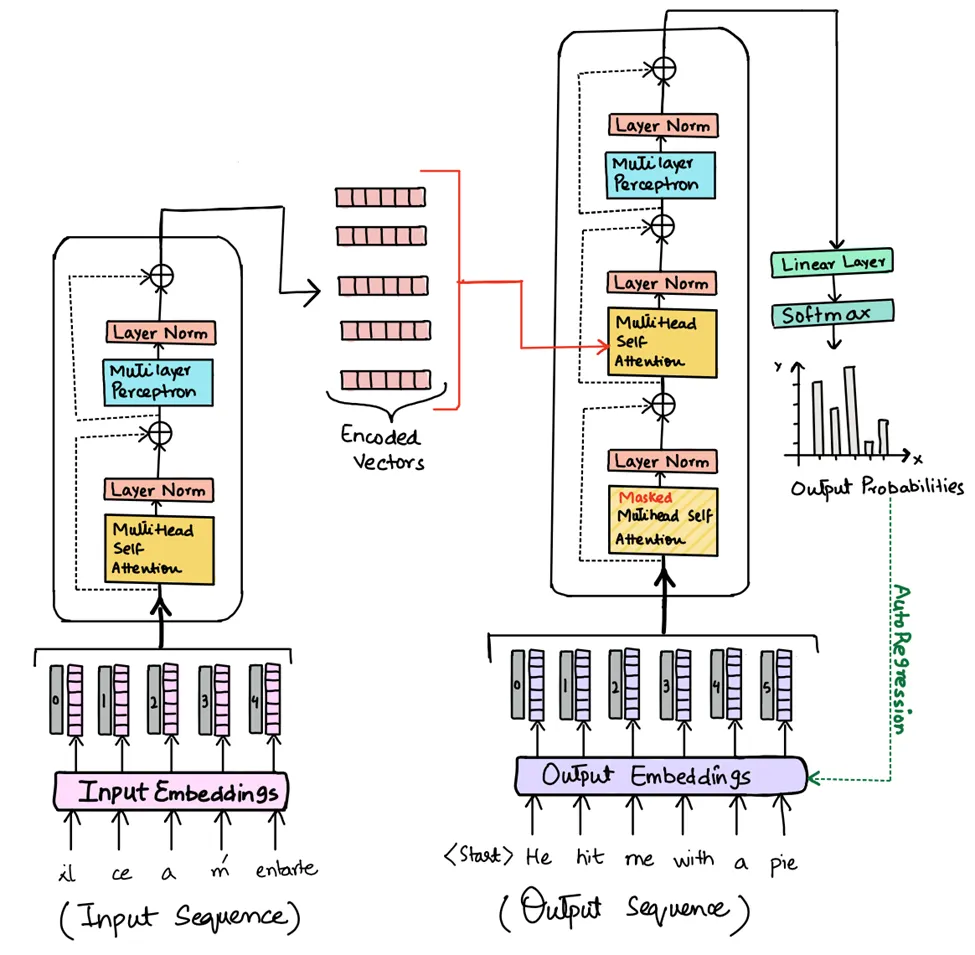

# 🌟 BERT: Bidirectional Encoder Representations from Transformers

## 📘 Introduction
**BERT** is a language representation model developed by Google in 2018. Unlike traditional models that read text either left-to-right or right-to-left, BERT reads in **both directions simultaneously** using the Transformer architecture.

> 🧠 BERT is pre-trained on a large text corpus and can be fine-tuned for a variety of downstream NLP tasks (e.g., classification, QA, NER).

---

## 🌍 Motivation

Before BERT, many NLP models processed language in a **unidirectional** way — either left-to-right or right-to-left. This limited their ability to understand the **full context** of a word within a sentence.

> 🔑 **BERT was designed to deeply understand language context by reading in both directions — simultaneously.**

### 🔁 Why Bidirectional?
- Words gain meaning from surrounding words.
- Example:
  ```
  Sentence: "He wore a *mask* to the party."
  Sentence: "He wore a *mask* during surgery."
  ```
  In both cases, the word *mask* has different meanings. BERT looks **left and right** to understand which meaning is correct.

---

### 🧩 Key Ideas:
- **Masked Language Modeling (MLM):**  
  Randomly hides some words and asks the model to guess them based on the full context.
  
- **Next Sentence Prediction (NSP):**  
  Helps BERT understand how sentences relate to each other — useful for tasks like QA and dialogue.

---
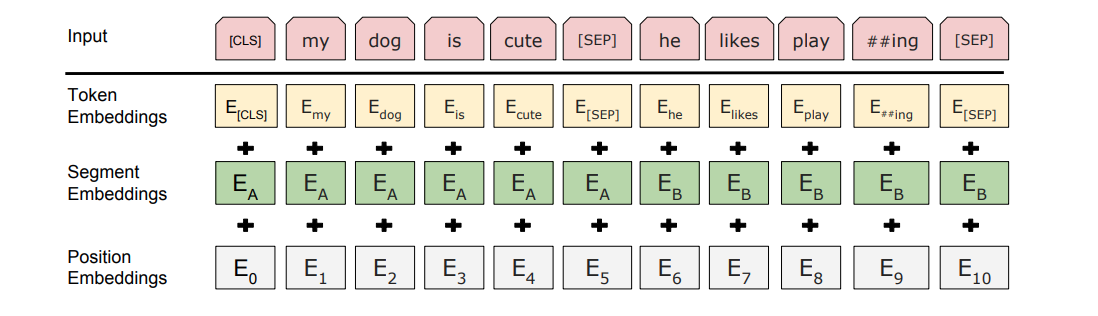
## 📚 References

- Paper: [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding (Devlin et al., 2018)](https://arxiv.org/abs/1810.04805)
- HuggingFace Transformers: https://huggingface.co/transformers/

In [1]:
!pip install transformers datasets torch arabic-reshaper python-bidi
!pip install accelerate evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**1. Load and Explore the Dataset**

In [2]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.4 MB/s eta 0:00:00


In [3]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    TrainingArguments,
    Trainer
)
from datasets import Dataset, load_dataset
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
import arabic_reshaper
from bidi.algorithm import get_display
import os


os.environ["WANDB_DISABLED"] = "true"

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Using device: cuda
GPU: Tesla T4


In [5]:
# Load ARCD (Arabic Reading Comprehension Dataset)
dataset = load_dataset("arcd", split="train")
print("ARCD dataset loaded successfully!")
print(f"Dataset size: {len(dataset)}")

print("\nSample data:")
for i in range(3):
    print(f"Context: {dataset[i]['context'][:100]}...")
    print(f"Question: {dataset[i]['question']}")
    print(f"Answer: {dataset[i]['answers']['text'][0]}")
    print("-" * 50)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/174k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/192k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/693 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/702 [00:00<?, ? examples/s]

ARCD dataset loaded successfully!
Dataset size: 693

Sample data:
Context: جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة المنورة - 2 أكتوبر 2018)، صحفي وإعلامي سعودي، رأس عدّ...
Question: - من هو جمال أحمد حمزة خاشقجي؟
Answer: صحفي وإعلامي
--------------------------------------------------
Context: جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة المنورة - 2 أكتوبر 2018)، صحفي وإعلامي سعودي، رأس عدّ...
Question: - متى ولد جمال أحمد حمزة خاشقجي وتوفي؟ ال
Answer: حمزة خاشقجي (13 أكتوبر 1958، المدينة المنورة - 2 أكتوبر 2018)،
--------------------------------------------------
Context: جمال أحمد حمزة خاشقجي (13 أكتوبر 1958، المدينة المنورة - 2 أكتوبر 2018)، صحفي وإعلامي سعودي، رأس عدّ...
Question: - في أي مدينة ولد جمال أحمد حمزة خاشقجي؟ ال
Answer: المدينة المنورة
--------------------------------------------------


**2-Load Pre-trained Arabic BERT Model**

In [6]:
# Load Arabic BERT model and tokenizer
model_name = "aubmindlab/bert-base-arabertv2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

print("Model and tokenizer loaded successfully!")

tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and tokenizer loaded successfully!


**3-Prepare Real Dataset for Training**

In [7]:
def prepare_training_features(examples):
    """Tokenize questions and contexts from real dataset"""

    # Tokenize the question and context
    tokenized_examples = tokenizer(
        examples["question"],
        examples["context"],
        truncation="only_second",
        max_length=384,
        stride=128,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offsets in enumerate(tokenized_examples["offset_mapping"]):
        # Map back to original example index
        sample_index = tokenized_examples.get("overflow_to_sample_mapping", [i])[i] if tokenized_examples.get("overflow_to_sample_mapping") else i
        sample_index = min(sample_index, len(answers) - 1)  # Bounds check

        # Get answer details
        current_answer = answers[sample_index]
        answer_start = current_answer["answer_start"][0]
        answer_text = current_answer["text"][0]
        answer_end = answer_start + len(answer_text)

        # Find token positions
        token_start_index = 0
        token_end_index = 0

        for idx, (start, end) in enumerate(offsets):
            if start is not None and end is not None:
                if start <= answer_start < end:
                    token_start_index = idx
                if start < answer_end <= end:
                    token_end_index = idx
                    break

        start_positions.append(token_start_index)
        end_positions.append(token_end_index)

    tokenized_examples["start_positions"] = start_positions
    tokenized_examples["end_positions"] = end_positions

    return tokenized_examples

# Split dataset (80% train, 20% eval)
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)

train_dataset = dataset.select(range(train_size))
eval_dataset = dataset.select(range(train_size, dataset_size))

# Apply preprocessing
tokenized_train = train_dataset.map(
    prepare_training_features,
    batched=True,
    remove_columns=train_dataset.column_names
)

tokenized_eval = eval_dataset.map(
    prepare_training_features,
    batched=True,
    remove_columns=eval_dataset.column_names
)

print(f"Training samples: {len(tokenized_train)}")
print(f"Evaluation samples: {len(tokenized_eval)}")

Map:   0%|          | 0/554 [00:00<?, ? examples/s]

Map:   0%|          | 0/139 [00:00<?, ? examples/s]

Training samples: 578
Evaluation samples: 148


**4-Define Training Arguments**

In [8]:
# Set up training arguments for real dataset
training_args = TrainingArguments(
    output_dir="./arabic-bert-qa",
    learning_rate=3e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    save_steps=200,
    eval_strategy="steps",
    eval_steps=200,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    warmup_steps=100,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


**5- Train the Model**

In [9]:

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
)

/tmp/ipython-input-2082765007.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [10]:
trainer.train()

print("Training setup complete!")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Step,Training Loss,Validation Loss
200,3.920400,3.806935
400,2.721100,3.299891
600,1.972400,3.503496
800,1.541600,3.870166
1000,1.514600,3.771601
1200,1.148800,4.203831
1400,0.975500,4.351880


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packa

Training setup complete!


**6-Prediction**

In [11]:
def answer_question(question, context):
    """Answer a question given a context"""

    # Tokenize input
    inputs = tokenizer(
        question,
        context,
        return_tensors="pt",
        max_length=512,
        truncation=True,
        padding=True
    )

    # Move to device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get start and end logits
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    # Find the most likely start and end positions
    start_index = torch.argmax(start_logits, dim=1).item()
    end_index = torch.argmax(end_logits, dim=1).item()

    # Extract answer tokens
    answer_tokens = inputs["input_ids"][0][start_index:end_index+1]
    answer = tokenizer.decode(answer_tokens, skip_special_tokens=True)

    return answer

**7-Testing**

In [12]:
# Test with real examples from the dataset
print("Testing with real dataset examples:")
print("=" * 50)
print("NOTE: Low accuracy is expected before fine-tuning!")
print("=" * 50)

# Get a few test examples
test_examples = dataset.select(range(30, 35))  # Use samples 5-10 for testing

for i, example in enumerate(test_examples):
    context = example['context']
    question = example['question']

    # Get ground truth answer
    ground_truth = example['answers']['text'][0]

    # Get model prediction
    predicted_answer = answer_question(question, context)

    print(f"Example {i+1}:")
    print(f"Question: {question}")
    print(f"Predicted: {predicted_answer}")
    print(f"Ground Truth: {ground_truth}")
    print(f"Match: {'✓' if predicted_answer.strip().lower() == ground_truth.strip().lower() else '✗'}")
    print("-" * 30)

Testing with real dataset examples:
NOTE: Low accuracy is expected before fine-tuning!
Example 1:
Question: - ما هي العبارة التي يلحقها المسلمون عند ذكر الاسم؟ ال
Predicted: « صلى الله عليه وسلم »
Ground Truth: «صلى الله عليه وسلم»
Match: ✗
------------------------------
Example 2:
Question: - أين أعطى محمد (صلى الله عليه وسلم) تأثيرا كبيرا؟ ال
Predicted: « صلى الله عليه وسلم »
Ground Truth: في نفوس المسلمين،
Match: ✗
------------------------------
Example 3:
Question: - ماذا قال الكاتب اليهودي مايكل هارت عن محمد (صلى الله عليه وسلم)؟ ال
Predicted: 
Ground Truth: «الإنسان الوحيد في التاريخ الذي نجح نجاحًا مطلقًا على
Match: ✗
------------------------------
Example 4:
Question: - أين ولد؟ ال
Predicted: يتيم الأب ،
Ground Truth: في مكة.
Match: ✗
------------------------------
Example 5:
Question: - متى فقد أمه؟ ال
Predicted: ولد يتيم الأب ، وفقد أمه في مبكرة فتربى في كنف جده عبد المطلب ، ثم من بعده عمه أبي طالب حيث ترعرع ، وكان في تلك الفترة يعمل بالرعي ثم بالتجارة. تزوج في الخامسة والعشر

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


8-Evaluate Model Performance

In [13]:
from collections import Counter
import re

def normalize_arabic_text(text):
    """Normalize Arabic text for comparison"""
    # Remove diacritics and extra spaces
    text = re.sub(r'[\u064B-\u065F\u0670\u0640]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

def calculate_token_f1(predicted, ground_truth):
    """Calculate F1 score based on token overlap"""
    pred_tokens = normalize_arabic_text(predicted).split()
    truth_tokens = normalize_arabic_text(ground_truth).split()

    if len(pred_tokens) == 0 and len(truth_tokens) == 0:
        return 1.0

    if len(pred_tokens) == 0 or len(truth_tokens) == 0:
        return 0.0

    common_tokens = Counter(pred_tokens) & Counter(truth_tokens)
    num_common = sum(common_tokens.values())

    if num_common == 0:
        return 0.0

    precision = num_common / len(pred_tokens)
    recall = num_common / len(truth_tokens)

    return 2 * (precision * recall) / (precision + recall)

def evaluate_model_full_dataset(test_dataset):
    """Evaluate on entire dataset with token F1"""

    total_samples = len(test_dataset)
    print("🔍 Evaluating on FULL Dataset (Token F1)")
    print("=" * 45)
    print(f"Total samples: {total_samples}")

    f1_scores = []
    empty_predictions = 0

    print("Processing all samples...")

    for i in range(total_samples):
        example = test_dataset[i]
        context = example['context']
        question = example['question']
        ground_truth = example['answers']['text'][0]

        predicted = answer_question(question, context)

        # Check for empty predictions
        if not predicted.strip() or predicted.strip() == "غير محدد":
            empty_predictions += 1
            f1_scores.append(0.0)
        else:
            f1 = calculate_token_f1(predicted, ground_truth)
            f1_scores.append(f1)

        # Show progress every 50 samples
        if (i + 1) % 50 == 0:
            print(f"Processed {i + 1}/{total_samples} samples...")

    # Calculate average F1
    avg_f1 = sum(f1_scores) / len(f1_scores)

    print(f"\n📊 FULL DATASET RESULTS:")
    print(f"🤖 Average Token F1: {avg_f1:.3f}")
    print(f"📊 Total Samples: {total_samples}")
    print(f"⚠️  Empty Predictions: {empty_predictions}")
    print(f"📈 Valid Predictions: {total_samples - empty_predictions}")

    # Interpretation
    if avg_f1 >= 0.6:
        print("✅ GOOD performance on full dataset")
    elif avg_f1 >= 0.4:
        print("⚠️  FAIR performance on full dataset")
    else:
        print("❌ POOR performance on full dataset")

    # Additional stats
    non_zero_f1s = [f1 for f1 in f1_scores if f1 > 0]
    if non_zero_f1s:
        avg_non_zero_f1 = sum(non_zero_f1s) / len(non_zero_f1s)
        print(f"📊 Average F1 (excluding empty): {avg_non_zero_f1:.3f}")

    return avg_f1

# Run evaluation on entire dataset
full_dataset_f1 = evaluate_model_full_dataset(dataset)

🔍 Evaluating on FULL Dataset (Token F1)
Total samples: 693
Processing all samples...
Processed 50/693 samples...
Processed 100/693 samples...
Processed 150/693 samples...
Processed 200/693 samples...
Processed 250/693 samples...
Processed 300/693 samples...
Processed 350/693 samples...
Processed 400/693 samples...
Processed 450/693 samples...
Processed 500/693 samples...
Processed 550/693 samples...
Processed 600/693 samples...
Processed 650/693 samples...

📊 FULL DATASET RESULTS:
🤖 Average Token F1: 0.239
📊 Total Samples: 693
⚠️  Empty Predictions: 259
📈 Valid Predictions: 434
❌ POOR performance on full dataset
📊 Average F1 (excluding empty): 0.496


In [14]:
def arabic_qa_inference(question, context, show_confidence=True):
    """
    Perform inference using your trained Arabic BERT model
    """
    # Tokenize input
    inputs = tokenizer(
        question,
        context,
        return_tensors="pt",
        max_length=512,
        truncation=True,
        padding=True
    )

    # Move to device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get start and end logits
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    # Get probabilities for confidence score
    start_probs = torch.softmax(start_logits, dim=1)
    end_probs = torch.softmax(end_logits, dim=1)

    # Find the most likely start and end positions
    start_index = torch.argmax(start_logits, dim=1).item()
    end_index = torch.argmax(end_logits, dim=1).item()

    # Calculate confidence
    confidence = (start_probs[0][start_index] * end_probs[0][end_index]).item()

    # Extract answer tokens
    answer_tokens = inputs["input_ids"][0][start_index:end_index+1]
    answer = tokenizer.decode(answer_tokens, skip_special_tokens=True)

    if show_confidence:
        return answer, confidence
    else:
        return answer

# Test inference with custom examples
print("🤖 Arabic BERT QA Inference System")
print("=" * 50)

# Example 1: Technology
context1 = """
الذكاء الاصطناعي هو محاكاة الذكاء البشري في الآلات المبرمجة للتفكير والتعلم.
يشمل تطبيقات مثل التعرف على الكلام، والتعلم الآلي، والتخطيط، وحل المشكلات.
تستخدم شركات التكنولوجيا الذكاء الاصطناعي في منتجاتها لتحسين تجربة المستخدم.
"""

question1 = "ما هو الذكاء الاصطناعي؟"
answer1, conf1 = arabic_qa_inference(question1, context1)

print(f"Question: {question1}")
print(f"Answer: {answer1}")
print(f"Confidence: {conf1:.3f}")
print("-" * 30)

# Example 2: History
context2 = """
تأسست المملكة العربية السعودية على يد الملك عبد العزيز آل سعود في عام 1932.
تعتبر الرياض العاصمة وأكبر المدن، وتقع في وسط شبه الجزيرة العربية.
اللغة الرسمية هي العربية والعملة هي الريال السعودي.
"""

question2 = "متى تأسست المملكة العربية السعودية؟"
answer2, conf2 = arabic_qa_inference(question2, context2)

print(f"Question: {question2}")
print(f"Answer: {answer2}")
print(f"Confidence: {conf2:.3f}")
print("-" * 30)

# Example 3: Science
context3 = """
الجاذبية هي قوة طبيعية تجذب الأجسام نحو مركز الأرض. اكتشف إسحاق نيوتن قانون الجاذبية العام.
تبلغ سرعة الضوء في الفراغ 299,792,458 متر في الثانية، وهي أسرع سرعة ممكنة في الكون.
"""

question3 = "من اكتشف قانون الجاذبية؟"
answer3, conf3 = arabic_qa_inference(question3, context3)

print(f"Question: {question3}")
print(f"Answer: {answer3}")
print(f"Confidence: {conf3:.3f}")
print("=" * 50)

🤖 Arabic BERT QA Inference System
Question: ما هو الذكاء الاصطناعي؟
Answer: هو محاكاة الذكاء البشري
Confidence: 0.061
------------------------------
Question: متى تأسست المملكة العربية السعودية؟
Answer: 
Confidence: 0.087
------------------------------
Question: من اكتشف قانون الجاذبية؟
Answer: 
Confidence: 0.046
